### TODO

## EPIC Statistics 
<ul>
    <li> EPIC short names - Maps - <b>Done</b> </li>
 <li> EPIC Category - dashboard, NFR, others - <b>Done</b> </li>
 <li> created and updated dates - <b>Done</b> </li>
 <li> firt story created , last story updated - <b>Done</b> </li> 
 <li> count of user stories in EPIC - <b>Done</b> </li>
 <li> count of stories pending for EPIC - <b>Done</b> </li>
    <li> story points for EPIC -<b>Done</b></li>
 <li> <strike>count of subtasks per EPIC</strike> </li>
 <li> <strike>Time to create user stories since start of EPIC </li>
 <li> <strike>Time to create and close user stories and subtasks of EPIC </li>

</ul> 

## Bug Status at Project Level 
 <li> Bugs by status </li>
 <li> Bugs by EPIC </li>
 <li> Bugs by dashboard </li>
 <li> consider both sprint bugs and other bugs </li>
 <li> RCA </li>
 <li> timeline - by sprint </li>

## User Stories 
<ul>
<li> get user stories with number of subtasks under it. add column.  </li>
<li> subtasks in resolved, developer queue, qa queue </li>
<li> burndown chart / overall % complete for the project based on # of tasks and # of tasks resolved </li>
</ul>

## Reported By 
<ul> 
    <li> developer </li>
    <li> QA </li>
    <li> PM </li>
    <li> QA Manager </li>
    <li> Scrum Master </li>
    <li> Architect </li>
</ul>         

## Date Analysis 
<ul>
    <li>time since EPIC created </li>
    <li>number of days after EPIC Created user story created </li>
    <li>number of days user story in backlog - created vs in sprint </li>
    <li>number of days in sprint user story closed </li>
    <li>number of days in sprint subtask created </li>
    <li>number of days in sprint subtask closed </li>
    <li></li>
</ul>

## spillover Analysis 
<ul>
    <li># of sprints story spilled over </li>
    <li>time in backlog </li>
    <li>time in sprint to close time </li>
    <li>spillover by reporter, type of user story (bi, etl, nfr, team)</li>
</ul>

## Bugs Analysis 

#for doing above: do not get bugs and tasks in subtask query. get only subtasks. 
#get bugs and userstories and append that dataframe to original whenever a bug/userstory does not exist 
#get EPIC link / name in the dataset, subtask creationdate, sprintstart date, sprintend date

## Mapped Columns 
<ul>
    <li>#assign user stories as type : powerbi, etl, nfr, others </li>
    <li>#assign user stories as type : by PM, by Architect, Others </li>
    <li>#assign owner, subtask_assignee as : Dev, QA, Others </li>
</ul>

## Team Work and Inter-Team Analysis 
<ul>
    <li>##of different people worked on each story : swarming of team together </li>
    <li>which team is best in swarming on tickets </li>
    <li>tickets without subtasks </li>
    <li>subtask creation by day of the sprint </li>
    <li>subtask resolution by day of the sprint </li>
    <li>% completion of sprint by team </li>
    <li>most consistent teams : team that logs subtasks in advance and then resolves n number of subtasks everyday</li>
    <li>of subtasks resolved per day by each team </li>
    <li> burn down by subtasks creation and resolution</li>
</ul>

### Wish List 
<ul>
    <li>Get a report by each developer activities done in JIRA - Gitprime or Jira itself </li>
    <li># of tickets where some status was moved or an update was made</li>
</ul>

In [5]:
import numpy as np
import pandas as pd 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

In [14]:

#subtasks = pd.read_csv("subtasks.csv")
#parents = pd.read_csv("bugsuserstories.csv")
epics_orig = pd.read_excel(open('Master-Excel.xlsx', 'rb'),   sheet_name='EPICs')  
bugsandus = pd.read_excel(open('Master-Excel.xlsx', 'rb'),   sheet_name='Bugs and US')  
subtasks = pd.read_excel(open('Master-Excel.xlsx', 'rb'),   sheet_name='subtasks')
epics_maps = pd.read_excel(open('Master-Excel.xlsx', 'rb'),   sheet_name='EPICMaps')

In [15]:
mapperson = {'Marivette Castree': 'PM'
             , 'Nagarjuna Avvaru' : 'Architect'
             , 'Nitin Kaushik' : 'Manager'
             , 'Vimal Muralidharan' : 'Manager'
             , 'Bhuvan Sharma' : 'PM'
             , 'Sharanesh Aradhya' : 'QA'
             , 'Shamsh Hyder': 'QA'
             , 'Azaz Akhtar' : 'Dev'
             , 'Virupaksha Gouda' : 'QA'
             , 'Rachit Jain' : 'QA'
             , 'Devamanohari Nagendran' :'QA'
             , 'Sowmya Chelluboyina' : 'Dev'
             , 'Shemeem Peerumuhammed' : 'Dev'
             , 'Gary Bisaga': 'Architect'
             , 'Akash Singhal' : 'Dev'
             , 'Md Saz Akhtar' : 'Dev'
             , 'Shivi Bhatt': 'Dev'
             , 'Ishwinder Sandhu' : 'Dev'
             , 'Vaidehi Sharan' : 'Dev'
             , 'Srinivas Pramodh Kotipalli' : 'Dev'
             , 'Tejesh Gour' : 'Dev'
             , 'Jishi Chereekandy' : 'Dev'
             , 'Gaurav Dixit' : 'Dev'
             , 'Reeti Jauhari' : 'Dev'
             , 'Harshit Nyati' : 'Dev'
             , 'Rohit Gupta' : 'Dev'
             , 'Basavaraj Kudagi'  : 'Dev'   
             , 'Barnali Patnaik' : 'PM'
             , 'Chris Andrews': 'Architect'
             , 'Chris Husting': 'PM'
             , 'Christy Smith': 'PM'
             , 'Phani Bhushan M': 'QA'
             , 'Rachit Jain': 'QA'
             , 'Rajat Chouhan': 'QA'
             , 'Shivasheesh Mishra': 'Dev'
             , 'Virupaksha Gouda':'QA'
             , 'rcm-automation': 'PM'
             , 'saranesh.aradhya@powerschool.com':'QA'
             , 'Mark Fetterolf': 'Others'
             , 'Kevin Kirschten': 'QA'
             ,'Radian Baskoro': 'Others'
             ,'Erika Avery' :'Others'
             , 'Anoop Lekshminivas':'Dev'
              ,'Bala Ramiah': 'PM'
             ,'Aha Jira': 'PM'
             ,'Manoj Kumar': 'Others'
            }

status_epic = {'Ready for CPO Review': 'Open'
               , 'Ready for Epic Review' : 'Open'
               , 'Dev in Progress' : 'Open'
               , 'Known Scope Complete' : 'Open'
               , 'Closed' : 'Closed'
               , 'On Hold' : 'Hold'
               , 'Ready for Development': 'Open'
               , 'Open': 'Open'
              }

mapsubtasks = {'Sub-task': 'Dev Task'
               , 'Task' : 'Dev Task'
               , 'Dev Activity' : 'Dev Task'
               , 'QA-Test Development' : 'QA Task'
               , 'Peer Review' : 'Dev Task'
               , 'Bug' : 'Bug'
               , 'QA-Quality Walkthrough' : 'QA Task'
               , 'QA-Automation Development': 'QA Task'
               , 'QA-Manual Regression': 'QA Task'
               , 'User Story': 'User Story'
               , 'Develop Unit Test' : 'Dev Task'
               , 'QA-Test Documentation': 'QA Task'
               , 'Admin/Team - Task': 'Dev Task'
               , 'Sprint Bug' : 'Bug'
               , 'Release Inclusion Request': 'Others'
               , 'QA-Automated Regression': 'QA Task'
               , 'Research Task': 'Dev Task'
               , 'QA-Test Documentation': 'QA Task'
               , 'Devqual Testing' : 'Dev Task'
               , 'Product - Framework': 'User Story'
               , 'QA-Environments': 'QA Task'
               , 'Analysis/Design': 'User Story'
               , 'Doc Walkthrough': 'Dev Task'
               , 'Documentation': 'Dev Task'
               , 'Dev Support': 'Dev Task'
               , 'QA Task': 'QA Task'  
               ,'Automation Test': 'QA Task'
               , 'Technical Task': 'Dev Task'
              }

In [16]:
# get epics dataset ready 
epics = epics_orig.merge(epics_maps, how='left', left_on='Key', right_on='Key')
epics = epics.rename(columns = {'Key':'Epic', 'Reporter' : 'Epic reporter', 'Status':'Epic status' 
                                ,'Fix versions': 'Epic FV', 'Created':'Epic Created'
                                ,'Updated': 'Epic Updated'
                               })
epics = epics[['Epic', 'Epic reporter','Summary_epic','Epic status' 
               ,'Epic FV', 'Epic Created', 'Epic Updated'
               , 'Epic_short_name', 'EPIC_Classification']]

epics['Epic Reporter Role']  = epics['Epic reporter'].apply(lambda x : mapperson[x] if not pd.isnull(x) and mapperson[x] else x)
epics['epic_status_short']  = epics['Epic status'].apply(lambda x : status_epic[x] if not pd.isnull(x) and status_epic[x] else x)
epics.head()

,Epic,Epic reporter,Summary_epic,Epic status,Epic FV,Epic Created,Epic Updated,Epic_short_name,EPIC_Classification,Epic Reporter Role,epic_status_short
0,UIAD-10393,Marivette Castree,Critical Defects,Ready for Epic Review,NaN,2019-10-28 20:48:00,2019-12-04 21:54:00,Critical Defects,Defects,PM,Open
1,UIAD-8568,Aha Jira,Enhancements to Academics Dashboard (New KPI's...,Known Scope Complete,NaN,2019-07-16 19:49:00,2019-12-02 18:03:00,Academic Enhancements,Dashboard,PM,Open
2,UIAD-7823,Marivette Castree,Enrollment Dashboard - Enrollment Trends by Sc...,Dev in Progress,NaN,2019-06-19 00:37:00,2019-12-04 21:14:00,Enrollment Trends,Dashboard,PM,Open
3,UIAD-7505,Chris Husting,Address Data Variability Among Different Tenants,Ready for CPO Review,NaN,2019-05-31 12:45:00,2019-11-29 11:54:00,Data Variability,Technical,PM,Open
4,UIAD-7171,rcm-automation,Enhancements to Behavior Dashboard (New KPI's ...,Dev in Progress,NaN,2019-05-14 10:04:00,2019-12-02 14:44:00,Behavior Enhancements,Dashboard,PM,Open


In [17]:
#['Issue Type', 'Key', 'Summary', 'Epic Link', 'Assignee', 'Reporter','Status', 'Story Points', 'Sprint', 'Team', 'Fix versions', 'Created']
bugsandus = bugsandus.rename(columns = {'Issue Type': 'IssueType'
                  ,'Key': 'Issue Key'
                  ,'Summary': "Issue Summary"
                  , 'Epic Link': 'Epic Key'
                  , 'Assignee': 'Issue Assignee'
                  , 'Reporter': 'Issue Reporter'
                  ,'Status': 'Issue Status'
                  , 'Story Points': 'Issue Story Points'
                  , 'Sprint': 'Issue Sprint'
                  , 'Team': 'Issue Team'
                  , 'Fix versions': 'Issue FV'
                  , 'Created': 'Issue Created'
                 })
bugsandus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 12 columns):
IssueType             1011 non-null object
Issue Key             1011 non-null object
Issue Summary         1011 non-null object
Epic Key              936 non-null object
Issue Assignee        954 non-null object
Issue Reporter        1011 non-null object
Issue Status          1011 non-null object
Issue Story Points    645 non-null float64
Issue Sprint          1011 non-null object
Issue Team            966 non-null object
Issue FV              1009 non-null object
Issue Created         1011 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 94.9+ KB


In [28]:
epics['1stStoryCreated'] = epics['Epic'].apply(lambda x: bugsandus.loc[bugsandus['Epic Key']==x]['Issue Created'].min().date())
epics['LastStoryCreated'] =epics['Epic'].apply(lambda x: bugsandus.loc[bugsandus['Epic Key']==x]['Issue Created'].max().date())
epics['UserStories'] = epics['Epic'].apply(lambda x: bugsandus.loc[(bugsandus['IssueType'] == 'User Story') & (bugsandus['Epic Key']==x)  ]['Issue Key'].nunique())
epics['Bugs'] = epics['Epic'].apply(lambda x: bugsandus.loc[(bugsandus['IssueType'] == 'Bug') & (bugsandus['Epic Key']==x)  ]['Issue Key'].nunique())
epics['StoryPoints'] = epics['Epic'].apply(lambda x: bugsandus.loc[(bugsandus['IssueType'] == 'User Story') & (bugsandus['Epic Key']==x)  ]['Issue Story Points'].sum())
epics['UserStoriesClosed'] = epics['Epic'].apply(lambda x: bugsandus.loc[(bugsandus['IssueType'] == 'User Story') \
                                                                         & (bugsandus['Issue Status'].isin(['Ready for Release','Closed','Ready for Test'])) \
                                                                         & (bugsandus['Epic Key']==x)]['Issue Key'].nunique())



#epics['Epic Created'] = epics['Epic Created'].dt.date

In [29]:
epics

,Epic,Epic reporter,Summary_epic,Epic status,Epic FV,Epic Created,Epic Updated,Epic_short_name,EPIC_Classification,Epic Reporter Role,epic_status_short,1stStoryCreated,LastStoryCreated,UserStories,Bugs,StoryPoints,UserStoriesClosed
0,UIAD-10393,Marivette Castree,Critical Defects,Ready for Epic Review,NaN,2019-10-28 20:48:00,2019-12-04 21:54:00,Critical Defects,Defects,PM,Open,2019-03-30,2019-12-04,0,88,0.0,0
1,UIAD-8568,Aha Jira,Enhancements to Academics Dashboard (New KPI's...,Known Scope Complete,NaN,2019-07-16 19:49:00,2019-12-02 18:03:00,Academic Enhancements,Dashboard,PM,Open,2019-07-16,2019-11-20,32,4,192.0,31
2,UIAD-7823,Marivette Castree,Enrollment Dashboard - Enrollment Trends by Sc...,Dev in Progress,NaN,2019-06-19 00:37:00,2019-12-04 21:14:00,Enrollment Trends,Dashboard,PM,Open,2019-06-19,2019-11-25,22,14,128.0,21
3,UIAD-7505,Chris Husting,Address Data Variability Among Different Tenants,Ready for CPO Review,NaN,2019-05-31 12:45:00,2019-11-29 11:54:00,Data Variability,Technical,PM,Open,2019-09-17,2019-11-29,3,1,24.0,0
4,UIAD-7171,rcm-automation,Enhancements to Behavior Dashboard (New KPI's ...,Dev in Progress,NaN,2019-05-14 10:04:00,2019-12-02 14:44:00,Behavior Enhancements,Dashboard,PM,Open,2019-05-21,2019-11-14,57,30,303.0,52
5,UIAD-7162,Barnali Patnaik,Build Knowledge Index for Unified Insights Team,Ready for Development,UIAD_GA,2019-05-14 08:03:00,2019-09-25 18:32:00,Knowledge Index,Technical,PM,Open,NaT,NaT,0,0,0.0,0
6,UIAD-7148,rcm-automation,Enhancements to Attendance Dashboard (New KPI'...,Dev in Progress,NaN,2019-05-13 18:26:00,2019-12-03 19:42:00,Attendance Dashboard,Dashboard,PM,Open,2019-05-13,2019-11-29,87,36,498.0,75
7,UIAD-6466,Nagarjuna Avvaru,Unified Insights - Pipeline changes to support...,Closed,NaN,2019-03-26 04:22:00,2019-04-29 06:08:00,Pipeline Changes,Technical,Architect,Closed,NaT,NaT,0,0,0.0,0
8,UIAD-6328,Nagarjuna Avvaru,Unified Insights - Technical Stories required ...,Closed,NaN,2019-03-18 04:39:00,2019-05-23 07:07:00,Technical Stories,Technical,Architect,Closed,2019-03-18,2019-03-18,0,1,0.0,0
9,UIAD-6277,rcm-automation,Allow Ad Hoc Reports Access thru a My Dashboar...,Closed,NaN,2019-03-11 14:14:00,2019-10-29 21:14:00,My Dashboard,Dashboard,PM,Closed,2019-03-11,2019-09-04,4,2,29.0,4


In [320]:
epics.head()

,Epic,Epic reporter,Summary_epic,Epic status,Epic FV,Epic Created,Epic Updated,Epic_short_name,EPIC_Classification,Epic Reporter Role,epic_status_short,1stStoryCreated,LastStoryCreated,UserStories,Bugs,StoryPoints
0,UIAD-10393,Marivette Castree,Critical Defects,Ready for Epic Review,NaN,2019-10-28,2019-12-04 21:54:00,Critical Defects,Defects,PM,Open,2019-03-30,2019-12-04,0,88,0.0
1,UIAD-8568,Aha Jira,Enhancements to Academics Dashboard (New KPI's...,Known Scope Complete,NaN,2019-07-16,2019-12-02 18:03:00,Academic Enhancements,Dashboard,PM,Open,2019-07-16,2019-11-20,32,4,192.0
2,UIAD-7823,Marivette Castree,Enrollment Dashboard - Enrollment Trends by Sc...,Dev in Progress,NaN,2019-06-19,2019-12-04 21:14:00,Enrollment Trends,Dashboard,PM,Open,2019-06-19,2019-11-25,22,14,128.0
3,UIAD-7505,Chris Husting,Address Data Variability Among Different Tenants,Ready for CPO Review,NaN,2019-05-31,2019-11-29 11:54:00,Data Variability,Technical,PM,Open,2019-09-17,2019-11-29,3,1,24.0
4,UIAD-7171,rcm-automation,Enhancements to Behavior Dashboard (New KPI's ...,Dev in Progress,NaN,2019-05-14,2019-12-02 14:44:00,Behavior Enhancements,Dashboard,PM,Open,2019-05-21,2019-11-14,57,30,303.0


In [132]:
subtasks.columns
subtasks = subtasks.rename(columns={'Issue Type': 'subtask type'
                                    , 'Key': 'subtask key'
                                    , 'Summary': 'subtask summary'
                                    , 'Assignee': 'subtask assignee'
                                    , 'Reporter': 'subtask reporter'
                                    , 'Status': 'subtask status'
                                    , 'Updated': 'subtask updated'
                                    , 'Sprint': 'subtask sprint'
                                    , 'parent': 'subtask parent'
                                    , 'Epic Link': 'epic key'
                                    , 'Fix versions': 'subtask FV'
                                    , 'Created': 'subtask created'
                                   })

subtasks['subtask type cat']  = subtasks['subtask type'].apply(lambda x : mapsubtasks[x] if not pd.isnull(x) and mapsubtasks[x] else x)

subtasks.head()                           

,subtask type,subtask key,subtask summary,subtask assignee,subtask reporter,subtask status,subtask updated,subtask sprint,subtask parent,epic key,subtask FV,subtask created,subtask type cat
0,QA-Test Documentation,UIAD-11180,QPS,Vaidehi Sharan,Vaidehi Sharan,Open,2019-12-05 17:47:00,19S25-UIAD,UIAD-9969,NaN,NaN,2019-12-05 17:33:00,QA Task
1,Task,UIAD-11177,Update query for ELL name,NaN,Rohit Gupta,Open,2019-12-05 15:56:00,19S25-UIAD,UIAD-10976,NaN,NaN,2019-12-05 15:56:00,Dev Task
2,Task,UIAD-11176,Update query for SpecialEdname,NaN,Rohit Gupta,Open,2019-12-05 15:56:00,19S25-UIAD,UIAD-10976,NaN,NaN,2019-12-05 15:56:00,Dev Task
3,Task,UIAD-11175,Update query for GenderName,NaN,Rohit Gupta,Open,2019-12-05 15:54:00,19S25-UIAD,UIAD-10976,NaN,NaN,2019-12-05 15:51:00,Dev Task
4,Task,UIAD-11174,Update query for RaceName,NaN,Rohit Gupta,Open,2019-12-05 15:54:00,19S25-UIAD,UIAD-10976,NaN,NaN,2019-12-05 15:51:00,Dev Task


In [315]:
bugsandus = bugsandus.merge(epics, how='left', left_on='Epic Key', right_on='Epic', suffixes=('','_issue'))

In [146]:
bugsandus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 27 columns):
IssueType              1011 non-null object
Issue Key              1011 non-null object
Issue Summary          1011 non-null object
Epic Key               936 non-null object
Issue Assignee         954 non-null object
Issue Reporter         1011 non-null object
Issue Status           1011 non-null object
Issue Story Points     645 non-null float64
Issue Sprint           1011 non-null object
Issue Team             966 non-null object
Issue FV               1009 non-null object
Issue Created          1011 non-null datetime64[ns]
Epic                   936 non-null object
Epic reporter          936 non-null object
Summary_epic           936 non-null object
Epic status            936 non-null object
Epic FV                114 non-null object
Epic Created           936 non-null object
Epic Updated           936 non-null datetime64[ns]
Epic_short_name        936 non-null object
EPIC_Cla

In [316]:
master_df = subtasks.merge(bugsandus, how='left', left_on='subtask parent', right_on='Issue Key', suffixes=('','_st'))
master_df = master_df.drop(['epic key', 'Epic Key'],axis=1)

In [158]:
table = pd.pivot_table(bugsandus
                       ,columns=["Epic status","EPIC_Classification"]
                       ,index=["IssueType"]
                       ,values=["Issue Key"]
                       #,aggfunc={"Quantity":len,"Price":[np.sum,np.mean]}
                       ,aggfunc={"Issue Key":len}
                       ,fill_value=0
                      ,margins=True
                      )
table

Issue Key                                                                                                                                                  
Epic status            Closed                               Dev in Progress                        Known Scope Complete On Hold Ready for CPO Review Ready for Epic Review  All
EPIC_Classification Dashboard Data Set Ad Hoc NFR Technical       Dashboard Defects  NFR Technical            Dashboard Defects            Technical               Defects     
IssueType                                                                                                                                                                      
Bug                       142               2   0        16              91      12   85        13                    4      16                    1                    88  470
User Story                 74              47   4        13             199      11   82         1                   32       0                    3                     0  466
All                       216              49   4        29             290      23  167        14                   36      16                    4                    88  936

In [155]:
table = pd.pivot_table(bugsandus
                       ,columns=["epic_status_short","IssueType"]
                       ,index=["EPIC_Classification"]
                       ,values=["Issue Key"]
                       #,aggfunc={"Quantity":len,"Price":[np.sum,np.mean]}
                       ,aggfunc={"Issue Key":len}
                       ,fill_value=0
                      ,margins=True
                      )
table

Issue Key                                     
epic_status_short      Closed            Hold Open             All
IssueType                 Bug User Story  Bug  Bug User Story     
EPIC_Classification                                               
Dashboard                 142         74    0   95        231  542
Data Set Ad Hoc             2         47    0    0          0   49
Defects                     0          0   16  100         11  127
NFR                         0          4    0   85         82  171
Technical                  16         13    0   14          4   47
All                       160        138   16  294        328  936

In [38]:
epics = epics.dropna(axis=0, subset=['1stStoryCreated'])
epicswithus = epics.loc[epics.UserStories > 4]
epicswithus

,Epic,Epic reporter,Summary_epic,Epic status,Epic FV,Epic Created,Epic Updated,Epic_short_name,EPIC_Classification,Epic Reporter Role,epic_status_short,1stStoryCreated,LastStoryCreated,UserStories,Bugs,StoryPoints,UserStoriesClosed
1,UIAD-8568,Aha Jira,Enhancements to Academics Dashboard (New KPI's...,Known Scope Complete,NaN,2019-07-16 19:49:00,2019-12-02 18:03:00,Academic Enhancements,Dashboard,PM,Open,2019-07-16,2019-11-20,32,4,192.0,31
2,UIAD-7823,Marivette Castree,Enrollment Dashboard - Enrollment Trends by Sc...,Dev in Progress,NaN,2019-06-19 00:37:00,2019-12-04 21:14:00,Enrollment Trends,Dashboard,PM,Open,2019-06-19,2019-11-25,22,14,128.0,21
4,UIAD-7171,rcm-automation,Enhancements to Behavior Dashboard (New KPI's ...,Dev in Progress,NaN,2019-05-14 10:04:00,2019-12-02 14:44:00,Behavior Enhancements,Dashboard,PM,Open,2019-05-21,2019-11-14,57,30,303.0,52
6,UIAD-7148,rcm-automation,Enhancements to Attendance Dashboard (New KPI'...,Dev in Progress,NaN,2019-05-13 18:26:00,2019-12-03 19:42:00,Attendance Dashboard,Dashboard,PM,Open,2019-05-13,2019-11-29,87,36,498.0,75
11,UIAD-5928,rcm-automation,Beta Feedback for Unified Insights - Student,Dev in Progress,NaN,2019-02-20 21:55:00,2019-11-29 14:58:00,Beta Feedback,Defects,PM,Open,2018-09-11,2019-10-28,11,12,56.0,11
12,UIAD-5926,rcm-automation,"Enhancements to Attendance, Academics and Beha...",Closed,NaN,2019-02-20 21:55:00,2019-05-20 19:11:00,All Dashboards Enhancements,Dashboard,PM,Closed,2018-11-27,2019-02-21,8,0,55.0,8
13,UIAD-5925,rcm-automation,"Overview Dashboard correlating Attendance, Gra...",Dev in Progress,NaN,2019-02-20 21:54:00,2019-11-28 17:04:00,Overview Dashboard,Dashboard,PM,Open,2019-06-26,2019-11-14,15,6,67.0,15
14,UIAD-5924,rcm-automation,Add Meeting Attendance as a Data Model in Unif...,Closed,NaN,2019-02-20 21:54:00,2019-07-01 23:06:00,Meeting Attendance,Data Set Ad Hoc,PM,Closed,2019-03-11,2019-05-21,6,0,42.0,6
19,UIAD-5673,rcm-automation,Add Test Scores as a Data Model in Unified Ins...,Closed,NaN,2019-02-07 16:28:00,2019-08-16 19:44:00,Test Scores,Data Set Ad Hoc,PM,Closed,2019-03-11,2019-05-21,7,0,47.0,7
20,UIAD-4878,rcm-automation,Unified Insights Student - Dashboard Enhanceme...,Closed,NaN,2018-12-21 18:28:00,2019-05-14 09:54:00,All Dashboards Enhancements 2,Dashboard,PM,Closed,2018-12-21,2019-03-01,15,4,62.0,15


[0.06, 0.15, 0.16, 0.09, 0.21, 0.06, 0.94, 0.13, 0.18, 0.09, 0.23, 0.17, 0.07, 0.08, 1.0, 0.66, 0.25, 0.17, 0.37]


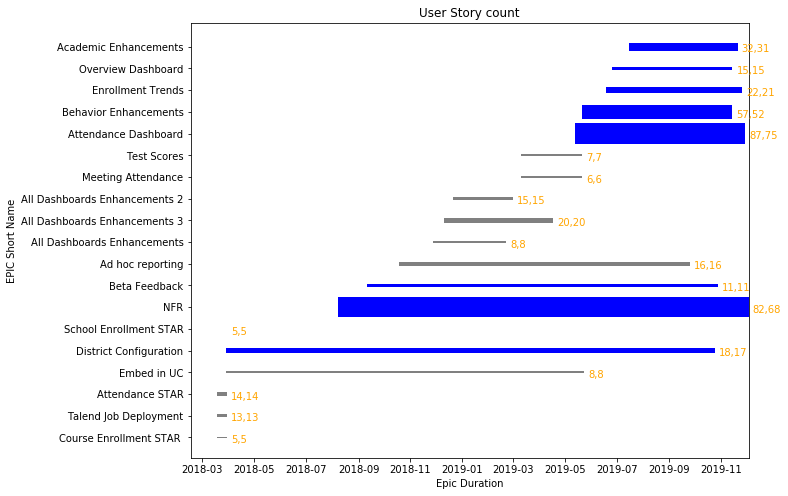

In [52]:
epicswithus1 = epicswithus[['Epic','Epic_short_name','1stStoryCreated','LastStoryCreated', 'UserStories','UserStoriesClosed','epic_status_short' ]].sort_values(by=['1stStoryCreated'])

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def drange(start, end, interval=dt.timedelta(days=1)):
    output = []
    while start <= end:
        output.append(start)
        start += interval
    return output

# Generate a series of dates for plotting...
edate = np.array(epicswithus1['1stStoryCreated'])
bdate = np.array(epicswithus1['LastStoryCreated'])
stories = np.array(epicswithus1['UserStories'])
storiesclosed = np.array(epicswithus1['UserStoriesClosed'])

# Now convert them to matplotlib's internal format...
edate, bdate = [mdates.date2num(item) for item in (edate, bdate)]

#ypos = []
ss = [round(s/max(stories),2) for s in stories]
print(ss)
#for i,s in enumerate(ss):
#    new = prev+s+.2
#    prev = new
#    ypos.append(new)

ypos = range(len(edate))
fig, ax = plt.subplots(figsize=(10, 8))

#set color based on epic status
col = epicswithus1['epic_status_short'].apply(lambda x: 'grey' if x == 'Closed' else 'blue')
col = list(col)

#print(help(ax.barh))
# Plot the data
ax.barh(np.array(epicswithus1['Epic_short_name']), edate - bdate, left=bdate, height=ss, align='center', color=col)
ax.axis('tight')

#position of text 
#x = bdate+(bdate+edate)/2
#y = i
#text = stories 

for i in range(len(bdate)):
    x = bdate[i]+5
    y = i
    tx = str(stories[i]) + ',' + str(storiesclosed[i])
    ax.text(x, y-.25, str(tx), color='orange')
    #ax.text(y, x , tx)

plt.title('User Story count')
plt.xlabel('Epic Duration')
plt.ylabel('EPIC Short Name')     
    
# We need to tell matplotlib that these are dates...
ax.xaxis_date()
plt.show()

[0.05, 0.03, 0.16, 0.1, 0.21, 0.05, 1.0, 0.11, 0.11, 0.1, 0.17, 0.12, 0.08, 0.09, 0.94, 0.57, 0.24, 0.13, 0.36]


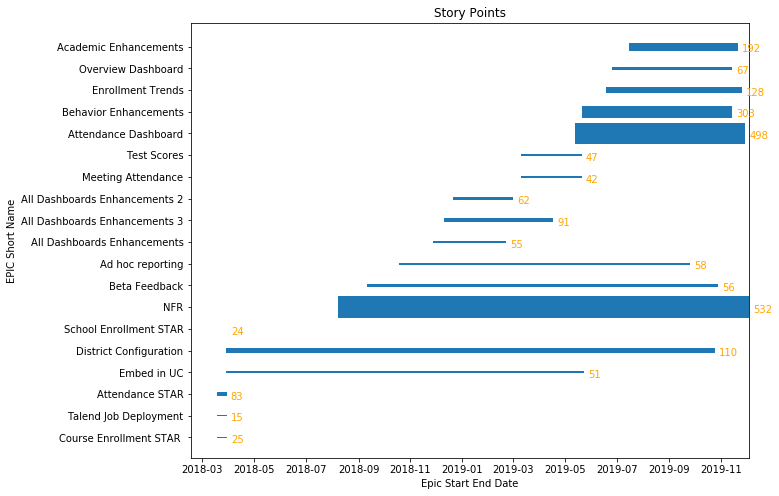

In [331]:
epicswithus2 = epicswithus[['Epic','Epic_short_name','1stStoryCreated','LastStoryCreated', 'StoryPoints' ]].sort_values(by=['1stStoryCreated'])

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def drange(start, end, interval=dt.timedelta(days=1)):
    output = []
    while start <= end:
        output.append(start)
        start += interval
    return output

# Generate a series of dates for plotting...
edate = np.array(epicswithus2['1stStoryCreated'])
bdate = np.array(epicswithus2['LastStoryCreated'])
stories = np.array(epicswithus2['StoryPoints'])


# Now convert them to matplotlib's internal format...
edate, bdate = [mdates.date2num(item) for item in (edate, bdate)]

#ypos = []
ss = [round(s/max(stories),2) for s in stories]
print(ss)
#for i,s in enumerate(ss):
#    new = prev+s+.2
#    prev = new
#    ypos.append(new)

ypos = range(len(edate))
fig, ax = plt.subplots(figsize=(10, 8))

#print(help(ax.barh))
# Plot the data
ax.barh(np.array(epicswithus2['Epic_short_name']), edate - bdate, left=bdate, height=ss, align='center')
ax.axis('tight')

#position of text 
#x = bdate+(bdate+edate)/2
#y = i
#text = stories 

for i in range(len(bdate)):
    x = bdate[i]+5
    y = i
    tx = int(stories[i])
    ax.text(x, y-.25, str(tx), color='orange')
    #ax.text(y, x , tx)


plt.title('Story Points')
plt.xlabel('Epic Duration')
plt.ylabel('EPIC Short Name')         
    
# We need to tell matplotlib that these are dates...
ax.xaxis_date()
plt.show()